<a href="https://colab.research.google.com/github/marystirling/Convolutional-Neural-Network-Asg-7/blob/main/Lab7_Part3_Ch6_Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11501568/11490434 [==============================] - 0s 0us/step


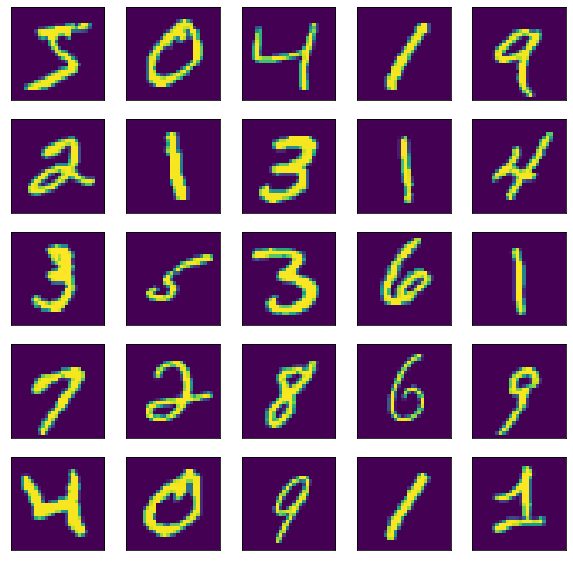

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 20)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2880)              0         
                                                                 
 dense (Dense)               (None, 100)               288100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 289,630
Trainable params: 289,630
Non-trainable params: 0
__________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 32s 17ms/step - loss: 0.1377 - accuracy: 0.9592 - val_loss: 0.0635 - val_accuracy: 0.9800
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0483 - accuracy: 0.9845 - val_loss: 0.0424 - val_accuracy: 0.9850
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.0408 - val_accuracy: 0.9864
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0454 - val_accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.0546 - val_accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0373 - val_accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0475 - val_accura

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the MNIST data
(Xtrain, ytrain), (Xtest, ytest) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
Xtrain, Xtest = Xtrain / 255.0, Xtest / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xtrain[i])
plt.show()

model = models.Sequential()
model.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(Xtrain, ytrain, epochs=10, 
                    validation_data=(Xtest, ytest))

In [ ]:
import numpy as np
print(np.shape(Xtrain))
print(Xtrain[0])
print(np.shape(ytrain))
print(ytrain[0])

(60000, 28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

In [ ]:
import numpy as np
from PIL import Image

# YOU MUST RUN THE PREVIOUS CODE CELL FIRST TO TRAIN THE DIGIT RECOGNITION MODEL

# load the photoshop digits and get them into "Keras" compatible format
test_data = [] 
test_labels = []
for digit in range(10): 
  im = Image.open(f"/content/drive/MyDrive/Colab Notebooks/imagedata/{digit}ps4.png","r") 
  pixels = list(im.getdata()) 
  pixels = [(255-comp)/255. for (comp, _, _) in pixels] 
  test_data.append(np.reshape(pixels,(28,28)))
  test_labels.append(digit)
#print(np.shape(test_data))
#print(test_data[0])
#print(np.shape(test_labels))
#print(test_labels[0])
predictions = model.predict(np.array(test_data))
print(predictions)
print([np.argmax(p) for p in predictions])

[[9.9999869e-01 5.1130818e-11 2.0414321e-09 2.6835715e-12 7.4963728e-13
  4.1557531e-09 3.5718919e-10 1.3036570e-06 5.0957767e-09 2.9742229e-09]
 [6.2070709e-09 9.9999678e-01 3.1812921e-09 6.2198469e-09 1.2485031e-06
  9.1272589e-09 7.2875244e-09 1.7833498e-06 5.5842282e-08 2.0600712e-08]
 [2.0110300e-14 4.0359102e-10 1.0000000e+00 6.3773425e-10 8.4016156e-18
  6.4009756e-20 2.9222999e-18 3.2669381e-11 4.0407920e-11 8.5167508e-18]
 [6.5835600e-21 2.7357274e-11 5.4323218e-13 1.0000000e+00 8.0833552e-12
  5.4172829e-11 2.1798491e-21 3.0341044e-12 1.1344033e-14 1.9110790e-13]
 [1.2490802e-15 4.5460215e-08 2.6479459e-12 2.6141478e-12 9.9999917e-01
  9.2126806e-10 7.3924061e-11 7.5970780e-07 5.3908042e-09 1.5290727e-10]
 [3.4000702e-24 5.6737902e-18 1.8099852e-23 1.3930691e-10 1.9289460e-17
  1.0000000e+00 9.7301826e-18 1.7478437e-17 4.4586999e-16 2.1718589e-11]
 [6.1892136e-10 6.5124889e-12 1.8423563e-12 3.8766063e-10 5.3587001e-13
  2.4130813e-07 9.9999809e-01 8.4930591e-16 1.6416465e-06 

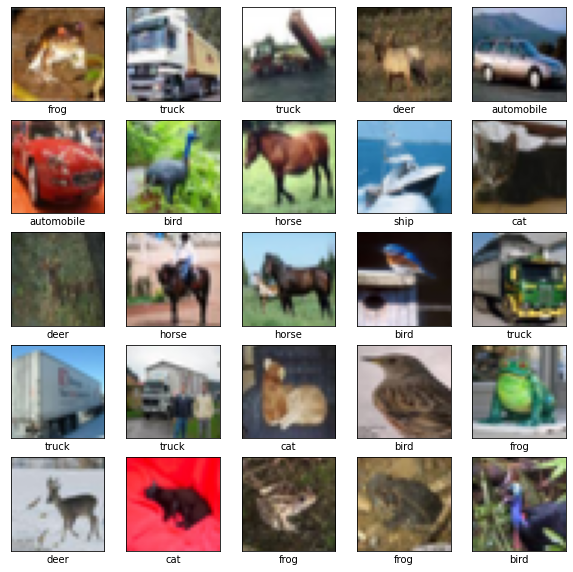

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 30, 30, 2)         56        
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 10, 10, 2)        0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 8, 8, 5)           95        
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 4, 4, 5)          0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 2, 2, 5)           230       
                                                                 
 flatten_9 (Flatten)         (None, 20)               

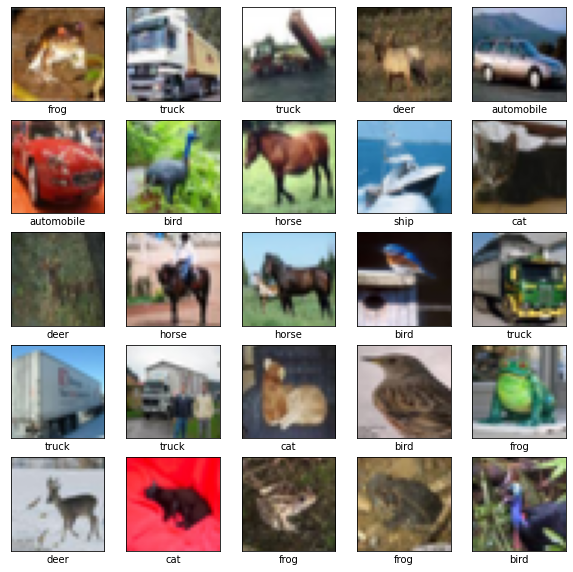

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 5)         140       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 10, 10, 5)        0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 8, 8, 10)          460       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 4, 4, 10)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 2, 2, 10)          910       
                                                                 
 flatten_10 (Flatten)        (None, 40)              

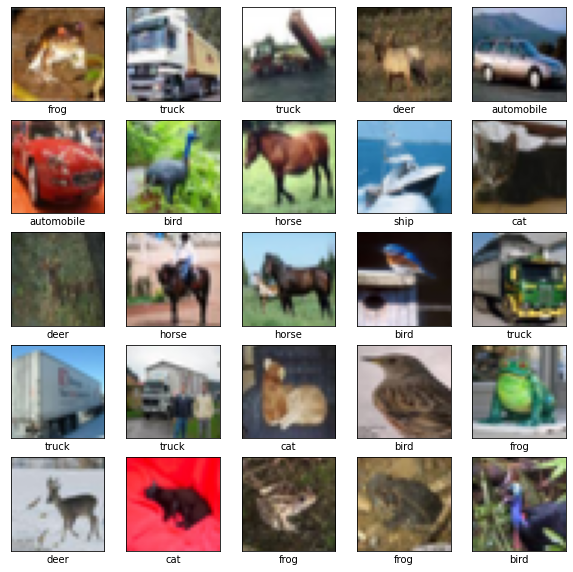

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 30, 30, 10)        280       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 10, 10, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 8, 8, 20)          1820      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 4, 4, 20)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 2, 2, 20)          3620      
                                                                 
 flatten_11 (Flatten)        (None, 80)              

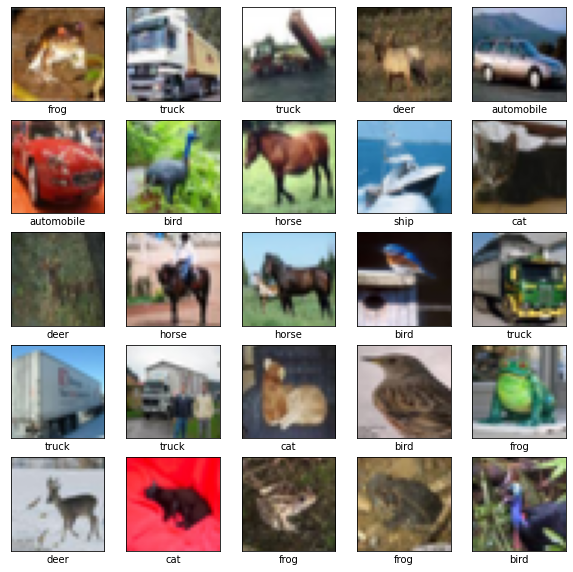

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 30, 30, 15)        420       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 10, 10, 15)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 8, 8, 30)          4080      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 4, 4, 30)         0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 2, 2, 30)          8130      
                                                                 
 flatten_12 (Flatten)        (None, 120)             

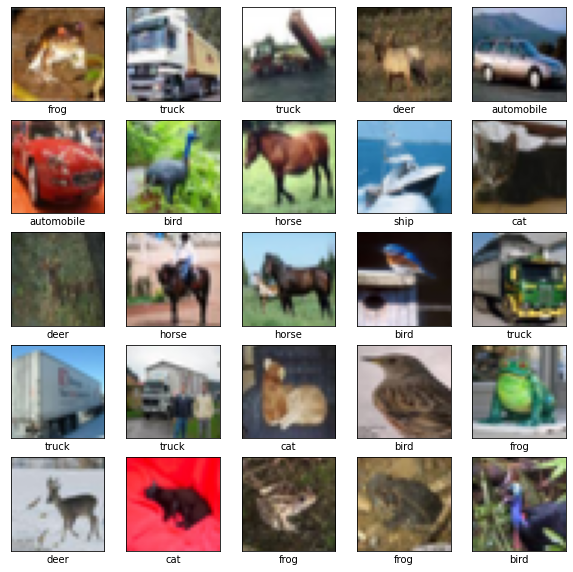

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 30, 30, 25)        700       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 10, 10, 25)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 8, 8, 50)          11300     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 4, 4, 50)         0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 2, 2, 50)          22550     
                                                                 
 flatten_13 (Flatten)        (None, 200)             

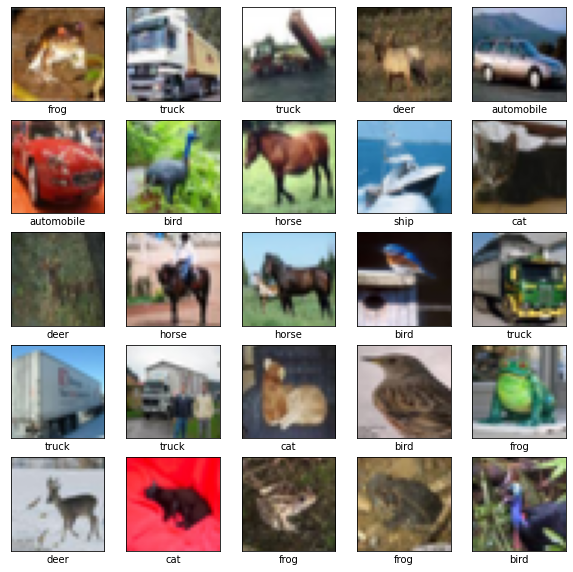

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 flatten_14 (Flatten)        (None, 9216)            

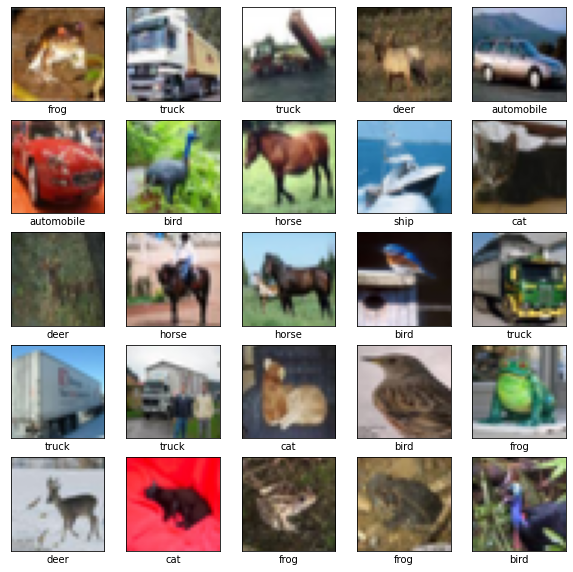

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_15 (Flatten)        (None, 1024)            

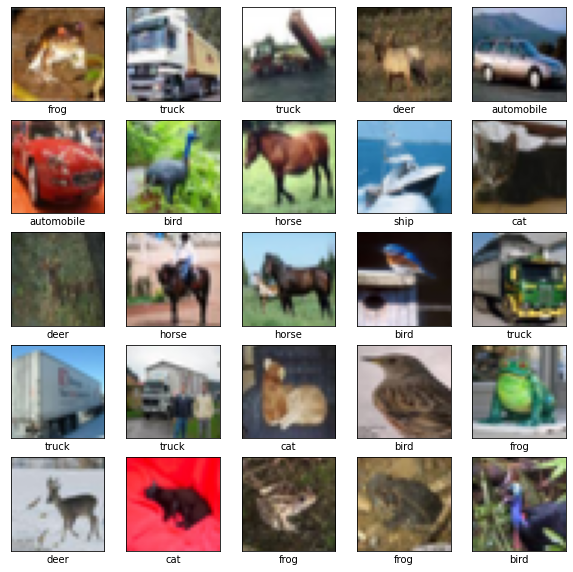

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 2, 2, 64)          36928     
                                                                 
 flatten_16 (Flatten)        (None, 256)             

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time
import numpy as np

# returns a tuple (totaltime, accuracy)
def trialrun(numfeaturemaps, poolsize):
  # Load the CIFAR10 data
  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  #train_images = train_images[:1000]
  #train_labels = train_labels[:1000]
  #test_images = test_images[:100]
  #test_labels = test_labels[:100]

  # Normalize pixel values to be between 0 and 1
  train_images, test_images = train_images / 255.0, test_images / 255.0
  
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(train_images[i])
      # The CIFAR labels happen to be arrays, 
      # which is why you need the extra index
      plt.xlabel(class_names[train_labels[i][0]])
  plt.show()

  model = models.Sequential()
  model.add(layers.Conv2D(numfeaturemaps/2, (3,3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D(poolsize))
  model.add(layers.Conv2D(numfeaturemaps, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(numfeaturemaps, (3,3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10))
  model.summary()
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  
  start = time.time()
  history = model.fit(train_images, train_labels, epochs=10, 
                      validation_data=(test_images, test_labels))
  finish = time.time()
  elapsed = finish - start
  return (elapsed, np.max(history.history['accuracy']))

featmapresults = []
for numfeatmaps in [5, 10, 20, 30, 50]:
  featmapresults.append(trialrun(numfeatmaps, (3,3)))

poolresults = []
for poolsize in [(1,1), (2,2), (3,3)]:
  poolresults.append(trialrun(64, poolsize))

print(featmapresults)
print(poolresults)


In [ ]:
print(featmapresults)
print(poolresults)

[(5.683504819869995, 0.2809999883174896), (6.702386856079102, 0.3179999887943268), (10.973120212554932, 0.3889999985694885), (11.003060340881348, 0.36899998784065247), (21.219950437545776, 0.4970000088214874)]
[(82.67205119132996, 0.7419999837875366), (21.0849027633667, 0.5400000214576721), (14.172033548355103, 0.4659999907016754)]


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


[0, 8, 0, 0, 0, 0, 6, 0, 0, 0, 0, 8, 0, 0, 0, 1, 0, 0, 0, 8, 0, 7, 1, 9, 2, 2, 0, 0, 0, 0, 0, 7, 1, 5, 9, 1, 9, 7, 2, 0, 5, 5, 8, 9, 1, 9, 0, 9, 9, 3, 5, 1, 1, 1, 5, 0, 6, 9, 9, 2, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 7, 5, 2, 2, 5, 0, 7, 7, 2, 0, 0, 5, 2, 2, 2, 2, 2, 3, 3, 7, 3, 5, 3, 6, 3, 8, 5, 3, 3, 5, 3, 3, 5, 5, 3, 3, 8, 5, 3, 3, 3, 3, 9, 3, 4, 4, 4, 4, 6, 4, 7, 4, 2, 5, 7, 4, 6, 9, 4, 4, 7, 4, 4, 7, 7, 2, 4, 7, 3, 4, 4, 4, 7, 4, 4, 5, 2, 5, 5, 7, 5, 5, 5, 7, 5, 9, 4, 7, 5, 5, 6, 4, 2, 5, 5, 7, 5, 5, 5, 9, 5, 5, 5, 6, 6, 3, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 9, 5, 5, 3, 6, 6, 6, 6, 2, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 0, 3, 9, 7, 7, 7, 7, 7, 5, 5, 7, 7, 9, 7, 7, 7, 7, 5, 7, 9, 8, 0, 8, 8, 0, 8, 8, 0, 8, 9, 0, 8, 8, 8, 8, 0, 9, 8, 8, 8, 0, 0, 8, 9, 8, 8, 8, 0, 0, 1, 9, 9, 9, 1, 1, 0, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 8, 9, 1, 1, 9, 9, 1, 9, 9, 9, 9]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

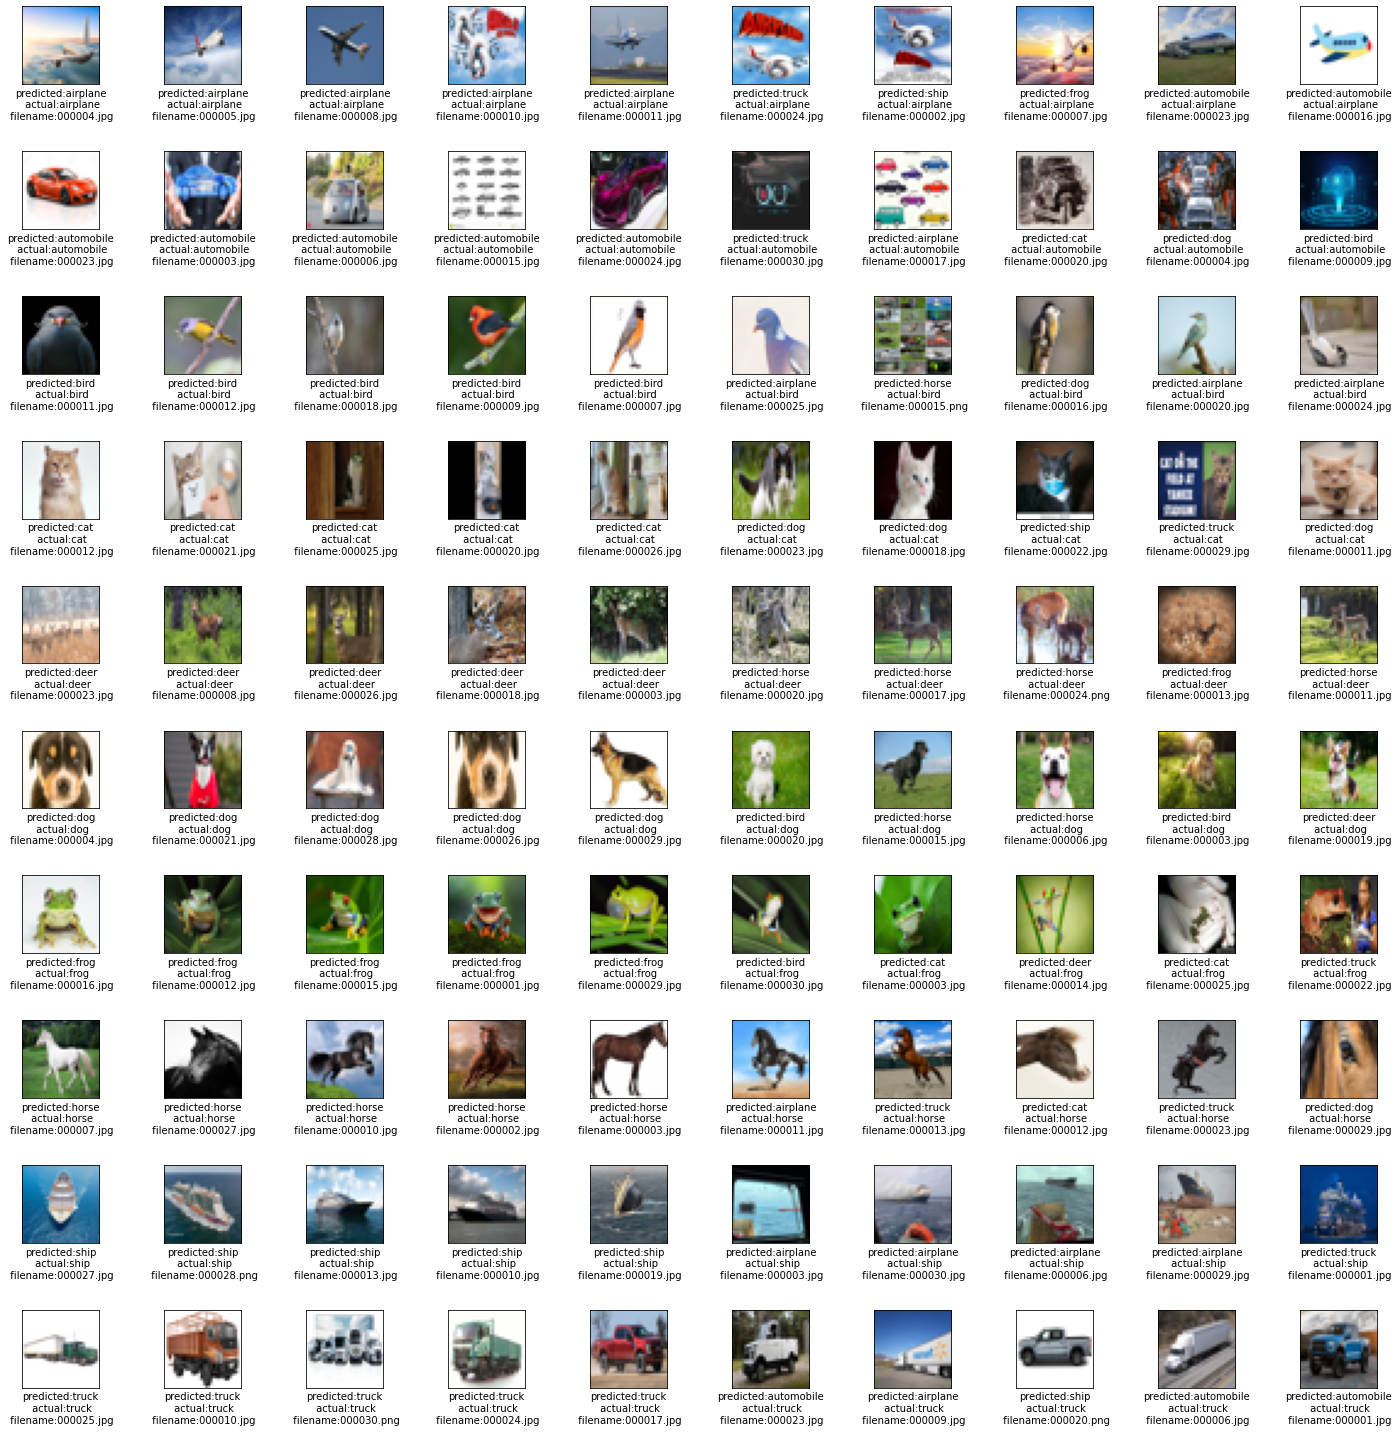

[8, 8, 0, 0, 0, 0, 4, 0, 8, 5, 0, 8, 0, 0, 0, 8, 0, 0, 8, 8, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 9, 1, 1, 7, 9, 0, 9, 5, 1, 0, 1, 9, 9, 9, 9, 6, 3, 1, 9, 1, 6, 8, 9, 9, 9, 2, 6, 2, 5, 2, 2, 1, 2, 7, 2, 2, 2, 9, 5, 5, 2, 1, 0, 7, 2, 2, 0, 2, 5, 2, 2, 2, 2, 2, 3, 3, 8, 3, 5, 3, 6, 3, 0, 5, 3, 5, 5, 3, 3, 3, 3, 3, 4, 9, 5, 3, 3, 3, 3, 9, 3, 4, 7, 4, 4, 6, 4, 2, 4, 4, 5, 7, 4, 6, 3, 4, 4, 2, 6, 2, 7, 7, 0, 4, 5, 3, 6, 3, 4, 4, 4, 4, 5, 2, 3, 5, 7, 5, 5, 5, 4, 2, 5, 5, 0, 5, 5, 6, 5, 2, 5, 5, 2, 9, 3, 5, 7, 5, 3, 0, 1, 6, 2, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 3, 6, 2, 2, 1, 6, 6, 6, 2, 7, 7, 7, 7, 5, 7, 7, 7, 7, 0, 0, 5, 9, 7, 7, 7, 5, 7, 5, 5, 7, 7, 0, 7, 3, 7, 9, 5, 0, 9, 8, 0, 8, 8, 0, 8, 8, 0, 8, 9, 8, 8, 8, 8, 1, 0, 9, 0, 8, 8, 8, 2, 8, 9, 8, 8, 8, 7, 0, 1, 9, 7, 9, 1, 1, 0, 9, 9, 9, 9, 1, 8, 1, 9, 9, 9, 8, 3, 0, 1, 9, 9, 1, 9, 1, 9, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

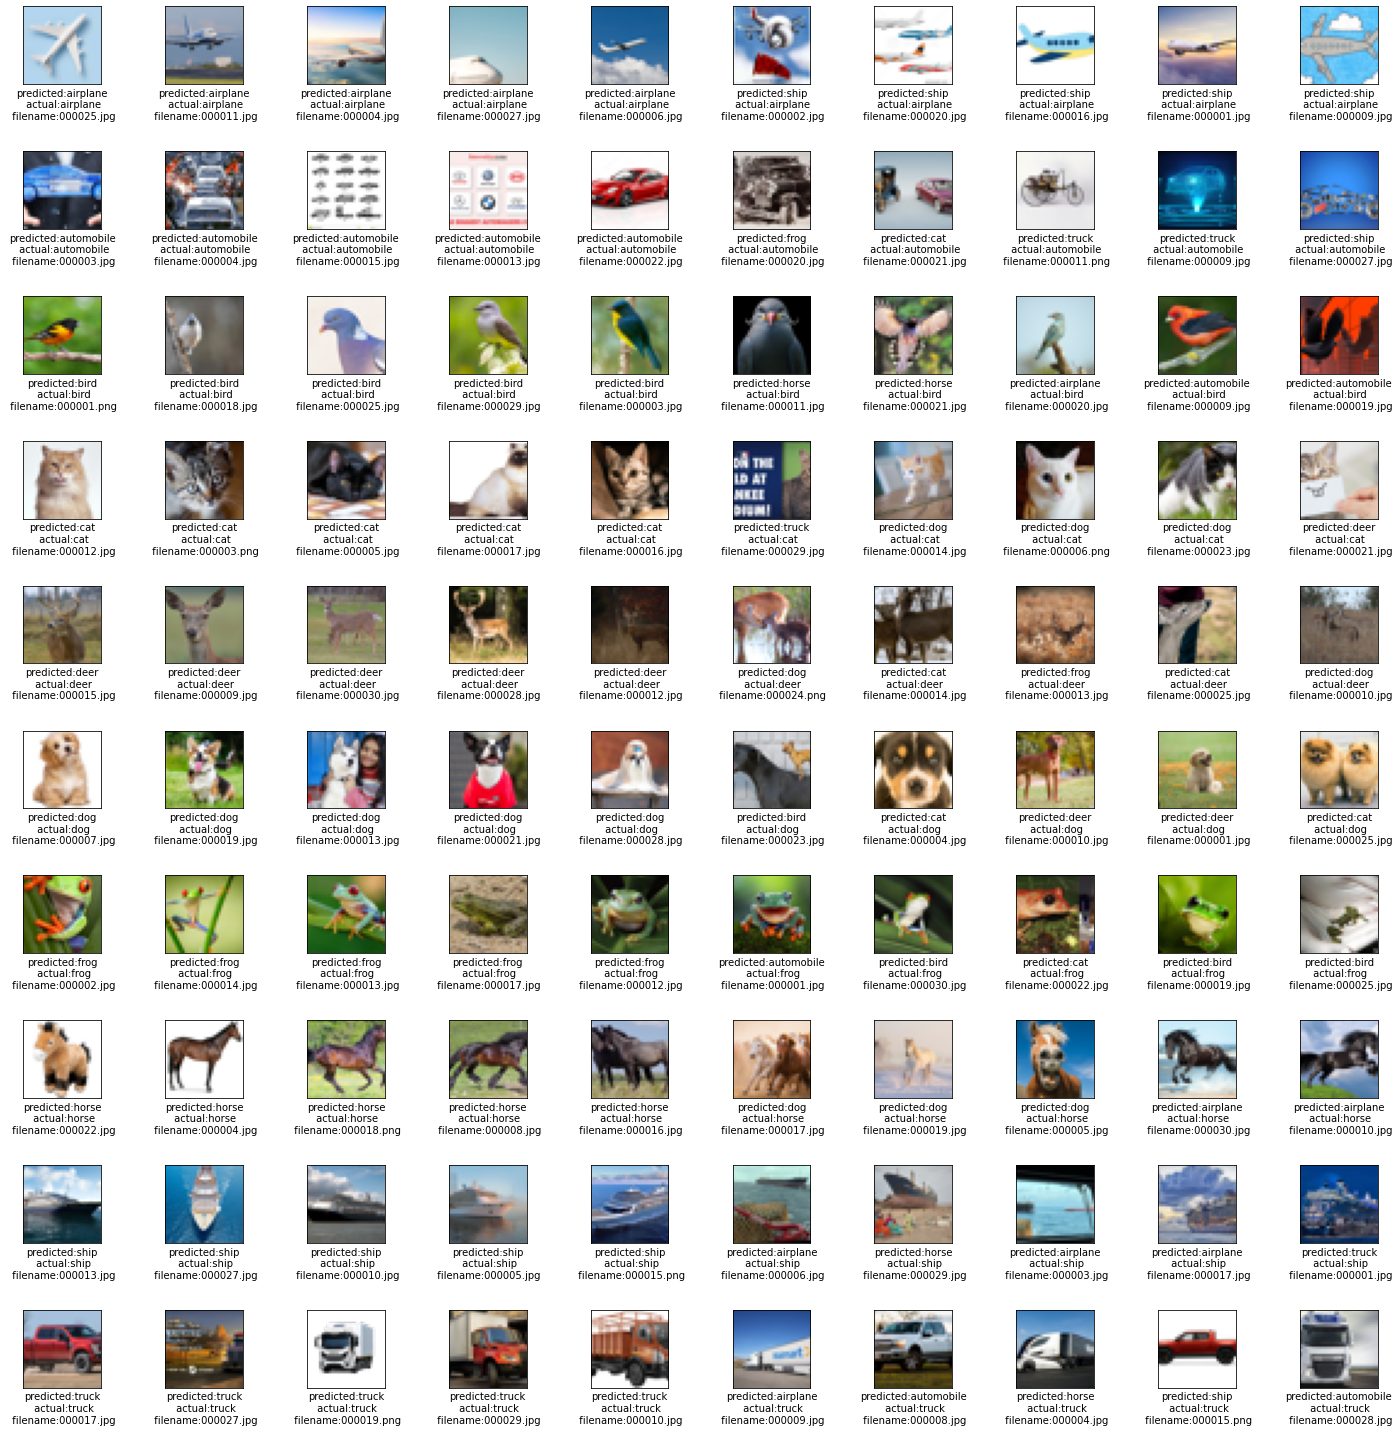

In [ ]:
# you must run the DownloadCIFAR10LikeData notebook first to download all the images into your cifartest folder
# then you must run the previous cell to train the CIFAR10 model!
# this cell simply resizes all the downloaded images to 32,32 naively without preserving scale
import os
import random as rd

# this cell resizes the largest square chunk from the center of the image preserving scale but potentially cropping data
# https://note.nkmk.me/en/python-pillow-image-crop-trimming/
def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

def crop_max_square(pil_img):
    return crop_center(pil_img, min(pil_img.size), min(pil_img.size))

# center specifies whether to do a square crop out of the center before resizing
def test_cifar_like_data(center = False):
  test_images = []
  test_data = []
  test_labels = []
  test_filenames = []
  for label, name in enumerate(class_names):
    directory_in_str = f"/content/drive/MyDrive/Colab Notebooks/cifartest/{name}"
    directory = os.fsencode(directory_in_str)
    for file in os.listdir(directory):
      filename = os.fsdecode(file)
      if filename.endswith(".jpg") or filename.endswith(".png"): 
        im = Image.open(directory_in_str + "/" + filename,"r")
        if center:
          im = crop_max_square(im)
        im = im.resize((32,32))
        pixels = list(im.getdata())
        if type(pixels[0]) is tuple:
          test_images.append(im)
          test_filenames.append(filename)
          if len(pixels[0])==3:
            normalized = [(r/255.,g/255.,b/255.) for r, g, b in pixels]
          elif len(pixels[0])==4:
            normalized = [(r/255.,g/255.,b/255.) for r, g, b, _ in pixels]
          test_data.append(np.reshape(normalized,(32,32,3)))
          test_labels.append(label)

  # now that we have all the data ready,
  # let's run the tests!
  predictions = model.predict(np.array(test_data))
  test_answers = [np.argmax(p) for p in predictions]
  print(test_answers)
  print(test_labels)
  diffs = np.subtract(test_answers, test_labels)
  cnt = 0
  for diff in diffs:
    if diff==0:
      cnt = cnt + 1
  if center:
    print("RESULTS: max square cropping out of center before resizing to 32x32")
  else:
    print("RESULTS: naive resizing of downloaded images to 32x32")
  print(f"{cnt} correct out of {len(test_labels)} == {100*cnt/(len(test_labels))} accuracy")

  # let's do a finer grain analysis of the percent correct from each class ... plus prep right/wrong lists for plot afterwards
  corrects = [[] for _ in range(10)]
  wrongs = [[] for _ in range(10)]
  for i, label in enumerate(test_labels):
    if test_answers[i] == label:
      corrects[label].append((test_images[i],label,test_filenames[i]))
    else:
      wrongs[label].append((test_images[i], test_answers[i], test_filenames[i]))

  # now let's display the stats first
  print("detailed stats")
  for i in range(10):
    print(f"{class_names[i]}: {len(corrects[i])} out of {len(corrects[i])+len(wrongs[i])} correct.")

  # pick 5 correct and 5 wrong from each class ... note that there may not be 5 correct (or 5 wrong)
  fig = plt.figure(figsize=(20,20))
  plti = 1 # the overall image count
  for classi in range(10):
    # pick random samples from both with the correct ones first so they show up in LEFT side of giant plot
    correctsamples = rd.sample(corrects[classi], min(len(corrects[classi]),5))
    wrongsamples = rd.sample(wrongs[classi],min(len(wrongs[classi]),5))
    allsamples = correctsamples + wrongsamples
    
    # simply duplicate the wrong one at the end if we didn't have 10
    while len(allsamples)<10:
      allsamples = allsamples + [allsamples[len(allsamples)-1]]
      
    for sample in allsamples:
      plt.subplot(10,10,plti)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(sample[0])
      plt.xlabel(f"predicted:{class_names[sample[1]]}\n actual:{class_names[classi]}\n filename:{sample[2]}")
      plti = plti + 1
  plt.tight_layout(h_pad=3, w_pad=0)
  plt.show()

# now run the test twice (once without cropping and once with max-square cropping)
test_cifar_like_data()
test_cifar_like_data(True)     